In [1]:
import os,sys
import pandas as pd
import numpy as np
import causality
import numpy
from causality.inference.search import IC
from causality.inference.independence_tests import RobustRegressionTest
import matplotlib.pyplot as plt
from causality.nonparametric.causal_reg import AdjustForDirectCauses
from networkx import DiGraph
import networkx as nx
%matplotlib inline

In [2]:
data = pd.read_csv('buzzfeed_facebook_statuses.csv')

In [3]:
SIZE = 10000
x1 = numpy.random.normal(size=SIZE)
x2 = x1 + numpy.random.normal(size=SIZE)
x3 = x1 + numpy.random.normal(size=SIZE)
x4 = x2 + x3 + numpy.random.normal(size=SIZE)
x5 = x4 + numpy.random.normal(size=SIZE)

In [5]:
X = pd.DataFrame({'x1' : x1, 'x2' : x2, 'x3' : x3, 'x4' : x4, 'x5' : x5})
variable_types = {'x1' : 'c', 'x2' : 'c', 'x3' : 'c', 'x4' : 'c', 'x5' : 'c'}

In [6]:
ic_algorithm = IC(RobustRegressionTest, X, variable_types)
graph = ic_algorithm.search()

In [7]:
graph.edges(data=True)

[('x2', 'x1', {'arrows': [], 'marked': False}),
 ('x2', 'x4', {'arrows': ['x4'], 'marked': False}),
 ('x3', 'x1', {'arrows': [], 'marked': False}),
 ('x3', 'x4', {'arrows': ['x4'], 'marked': False}),
 ('x4', 'x5', {'arrows': ['x5'], 'marked': True})]

In [8]:
g = DiGraph()
g.add_nodes_from(['x1','x2','x3','x4', 'x5'])
g.add_edges_from([('x1','x2'),('x1','x3'),('x2','x4'),('x3','x4'),('x4','x5')])
adjustment = AdjustForDirectCauses(g, X, ['x2'],['x3'],variable_types=variable_types)

In [9]:
adjustment = AdjustForDirectCauses(g, X, ['x2'],['x4'],variable_types=variable_types)

In [10]:
print adjustment.admissable_set
x = pd.DataFrame({'x2' : [0.8], 'x4' : [0.]})
print adjustment.effect.pdf(x)

set(['x1'])
0.188770394191


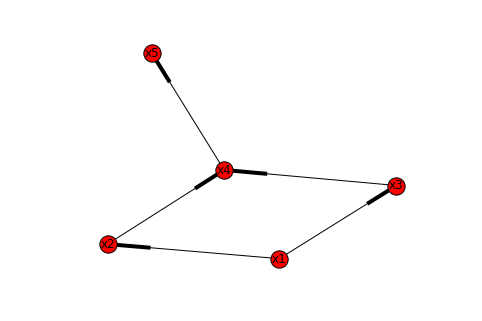

In [14]:
nx.draw(g,with_labels=True)

In [6]:
l = [1,2,3,4,5,6,7]
l[-3:]

[5, 6, 7]